In [34]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#from sklearn.metrics import plot_roc_curve

In [35]:
df = pd.read_csv("bank-loan.csv")
df.shape # (rows, columns)

(850, 9)

In [36]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [37]:
df.address.unique()

array([12,  6, 14,  0,  5,  9, 11,  4, 13,  1, 15, 19, 21,  3,  2, 26,  8,
       10,  7, 23, 18, 20, 25, 16, 17, 22, 27, 24, 29, 31, 34, 30],
      dtype=int64)

In [38]:
df.ed.unique()

array([3, 1, 2, 4, 5], dtype=int64)

In [39]:
df.income.unique()

array([176,  31,  55, 120,  28,  25,  67,  38,  19,  16,  23,  64,  29,
       100,  49,  41,  72,  61,  26,  52,  43,  27,  32,  69,  58,  37,
        20,  22,  35,  45,  54,  24,  50,  59,  48,  14,  21,  42,  34,
        80,  75,  46,  44,  51,  17,  39,  36,  15,  18,  82, 113, 121,
        60,  33,  65,  73,  68,  57, 135,  76,  30, 102,  79,  56,  78,
        40,  47,  88,  63, 116,  81, 145,  70, 118,  98, 144, 105,  96,
       159, 129,  89,  53, 220,  74,  62,  71,  99, 101, 126,  95, 132,
        91,  83, 157, 446, 242, 177, 221, 166,  94,  86, 190,  66, 249,
       123, 234, 115,  84, 114, 148, 186, 136,  77, 253, 150,  97, 107,
       108,  92, 139, 324, 169, 254, 266, 140, 138, 110,  93,  13],
      dtype=int64)

In [40]:
df.default.unique()

array([ 1.,  0., nan])

In [41]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [42]:
# Let's find out how many of each class there
df["default"].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

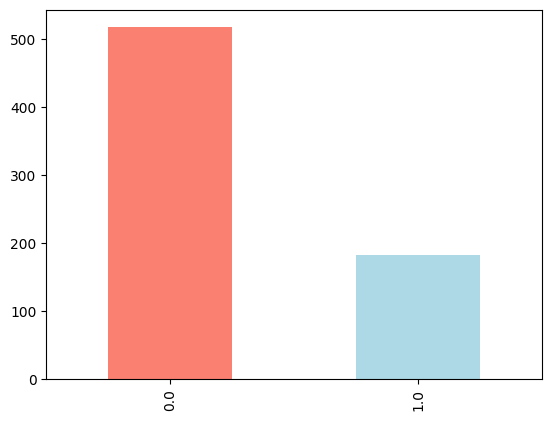

In [43]:
df["default"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [45]:
# Are there any missing values?
df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [46]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [47]:
df.ed.value_counts()

1    460
2    235
3    101
4     49
5      5
Name: ed, dtype: int64

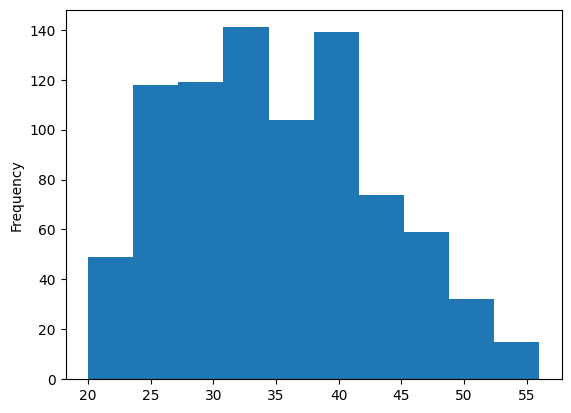

In [48]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [49]:
# Make a correlation matrix
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.137657
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.114676
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.282978
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.164451
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.070970
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.389575
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.244740
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


(9.5, -0.5)

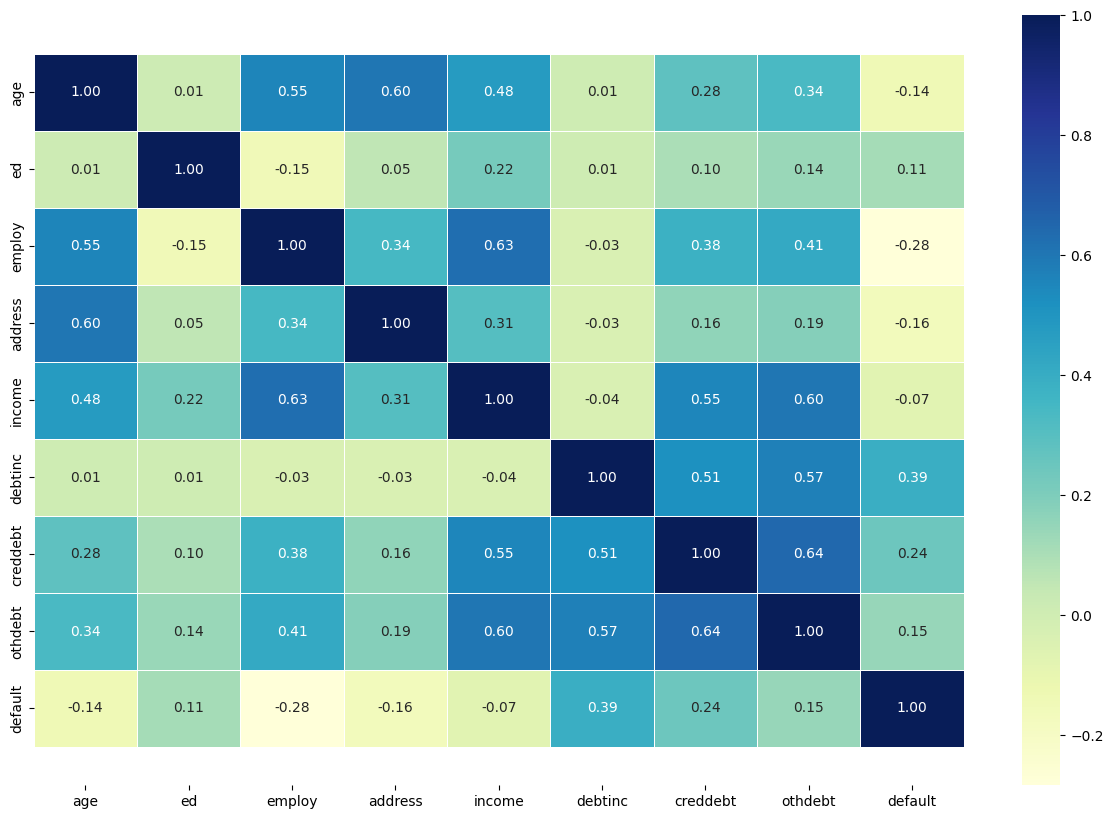

In [50]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

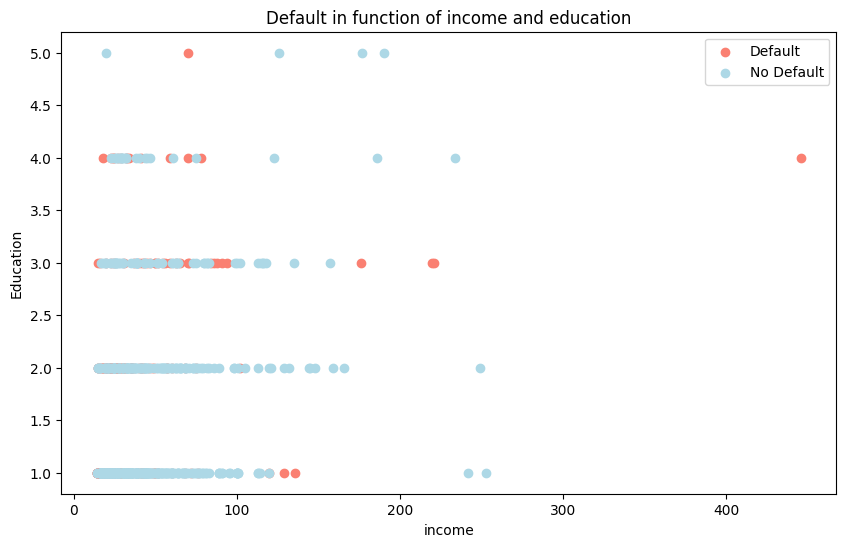

In [51]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.income[df.default==1],
            df.ed[df.default==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.income[df.default==0],
            df.ed[df.default==0],
            c="lightblue")

# Add some helpful info
plt.title("Default in function of income and education")
plt.xlabel("income")
plt.ylabel("Education")
plt.legend(["Default", "No Default"]);

In [52]:
df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [53]:
df = df.fillna(0)

In [54]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [56]:
#Modelling

# Split data into X and y
X = df.drop("default", axis=1)

y = df["default"]

In [57]:
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672
846,32,2,12,11,116,5.7,4.026708,2.585292
847,48,1,13,11,38,10.8,0.722304,3.381696
848,35,2,1,11,24,7.8,0.417456,1.454544


In [58]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
845    0.0
846    0.0
847    0.0
848    0.0
849    0.0
Name: default, Length: 850, dtype: float64

In [59]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [60]:
X_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt
332,28,4,2,4,41,2.5,0.459200,0.565800
383,37,1,3,3,25,3.7,0.275650,0.649350
281,34,1,15,2,39,24.7,4.373382,5.259618
2,40,1,15,14,55,5.5,0.856075,2.168925
231,55,1,3,11,40,8.0,0.563200,2.636800
...,...,...,...,...,...,...,...,...
71,28,2,5,9,34,23.8,3.099236,4.992764
106,53,1,9,18,50,11.2,2.016000,3.584000
270,51,2,22,23,120,7.6,4.140480,4.979520
435,24,2,1,2,42,5.7,0.837900,1.556100


In [62]:
y_train, len(y_train)

(332    1.0
 383    0.0
 281    1.0
 2      0.0
 231    1.0
       ... 
 71     0.0
 106    1.0
 270    0.0
 435    0.0
 102    0.0
 Name: default, Length: 680, dtype: float64,
 680)

In [63]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [64]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8176470588235294,
 'KNN': 0.788235294117647,
 'Random Forest': 0.8176470588235294}

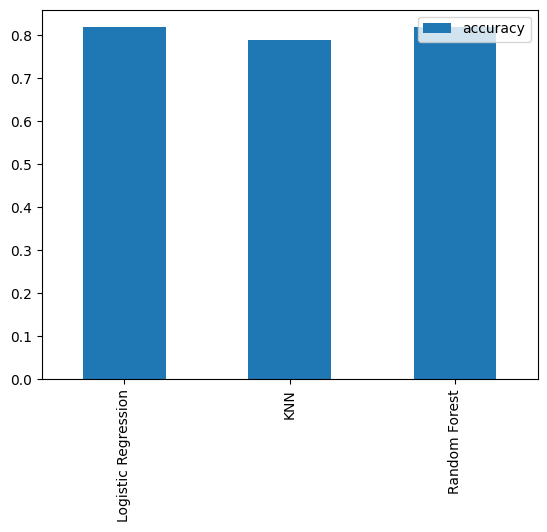

In [65]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [66]:
df.default.unique()

array([1., 0.])